# Import Packages

In [3]:
#Import Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set Up Initial Parameters Here

In [4]:
#Set up initial parameters

S_0 = 100
k_q = 0.5
v_q = 0.063
V_0 = 0.05
sigma_v = 0.38
rho = -0.321
rf = 0.05
delta_t = 1/252
n_years = 2

strike_price = 110

num_simulations = 5000

# Simulate Stock Prices and Volatilities

In [5]:
#Simulation

V_matrix = pd.DataFrame(np.zeros((252*2, num_simulations)))
S_matrix = pd.DataFrame(np.zeros((252*2, num_simulations)))

for i in range(num_simulations):
    V_matrix.iloc[0,i] = V_0
    S_matrix.iloc[0,i] = S_0


dW1 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))
dW2 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))

for i in range(num_simulations):
    for k in range(1, int(delta_t**-1*n_years)):
        dW1.iloc[k,i] = np.sqrt(delta_t)*np.random.randn() 
        dW2.iloc[k,i] = np.sqrt(delta_t)*np.random.randn()
        
        S_matrix.iloc[k,i] = S_matrix.iloc[k-1,i] + rf*S_matrix.iloc[k-1,i]*delta_t + np.sqrt(V_matrix.iloc[k-1, i])*S_matrix.iloc[k-1,i]*(rho*dW1.iloc[k,i] + np.sqrt(1-rho**2)*dW2.iloc[k,i])

        V_matrix.iloc[k,i] = V_matrix.iloc[k-1,i] + k_q*(v_q - V_matrix.iloc[k-1,i])*delta_t + sigma_v*np.sqrt(V_matrix.iloc[k-1,i])*dW1.iloc[k,i] 
        
        if S_matrix.iloc[k,i] < 0:
            S_matrix.iloc[k,i] = 0
        elif V_matrix.iloc[k,i] < 0:
            V_matrix.iloc[k,i] = 0

In [6]:
S_matrix

,0,1,2,3,4
0,100.000000,100.000000,100.000000,100.000000,100.000000
1,98.947704,100.495289,101.060286,98.188498,98.649140
2,98.158956,101.068786,101.073165,101.839282,97.419449
3,99.330633,99.472155,101.848311,101.642248,97.282803
4,98.429812,97.107784,101.428982,102.635422,97.303274
...,...,...,...,...,...
499,154.013079,73.040807,135.750764,106.268323,57.027447
500,155.306112,72.970308,135.732167,106.650085,56.130843
501,155.929482,74.236577,135.738876,106.671246,56.762284
502,158.877156,73.639592,135.697886,106.663250,56.598951


In [7]:
V_matrix

,0,1,2,3,4
0,0.050000,0.050000,0.050000,0.050000,0.050000
1,0.044816,0.051644,0.049307,0.048525,0.039882
2,0.046014,0.055980,0.050180,0.037925,0.040558
3,0.043952,0.053051,0.053130,0.040373,0.035698
4,0.049044,0.044580,0.053757,0.042807,0.040713
...,...,...,...,...,...
499,0.020083,0.038704,0.000286,0.001675,0.227554
500,0.025909,0.040031,0.000535,0.000000,0.244671
501,0.027850,0.043849,0.000751,0.000125,0.255275
502,0.027292,0.048100,0.001151,0.000000,0.263184


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Option Price

In [12]:
payoff_list = []
for column in S_matrix.columns:
    avg_price = S_matrix[column].mean()
    avg_payoff = max((avg_price - strike_price), 0)
    disc_payoff = avg_payoff*np.exp(-rf**n_years)
    payoff_list.append(disc_payoff)

price = sum(payoff_list)/len(payoff_list)

In [13]:
price

8.351471515494971

# Plot Simulated Stock Price Paths

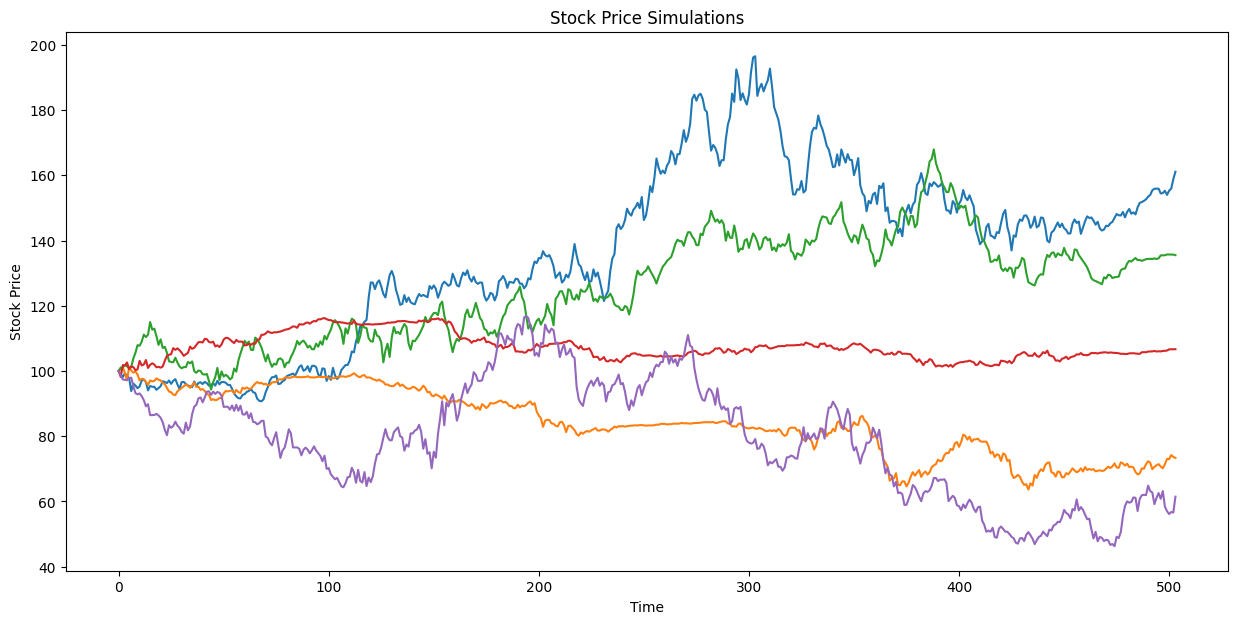

In [14]:
#Plot the paths

time = np.arange(int(delta_t**-1*n_years))

#Part 1: Stock Price

#for i in range(num_simulations):
plt.figure(figsize=(15,7))
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Simulations")
plt.plot(time, S_matrix);


# ...and Variance

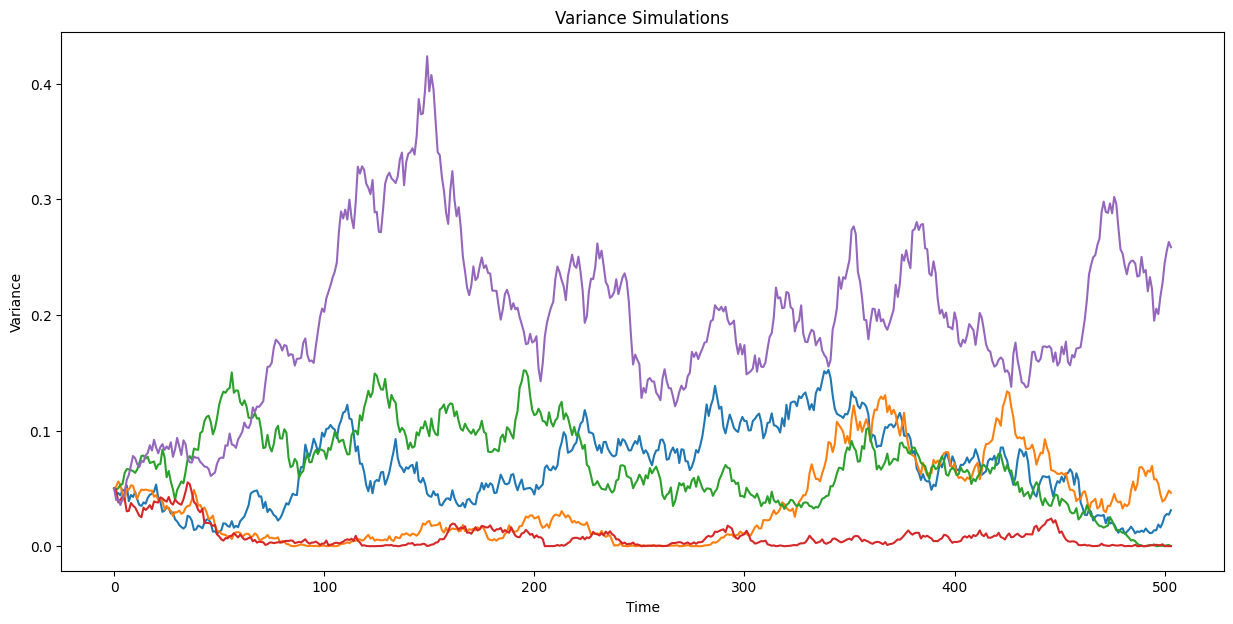

In [15]:
plt.figure(figsize=(15,7))
plt.title("Variance Simulations")
plt.xlabel("Time")
plt.ylabel("Variance")
plt.plot(time, V_matrix);

# Calculate Option Greeks Using 2000 Simulations

In [16]:
#Sensitivity

h = 1
num_simulations = 2000

# V-h

    
V_matrix_low = pd.DataFrame(np.zeros((252*2, num_simulations)))
S_matrix_low = pd.DataFrame(np.zeros((252*2, num_simulations)))

for i in range(num_simulations):
    V_matrix_low.iloc[0,i] = V_0
    S_matrix_low.iloc[0,i] = S_0 - h
    
barrier = 0.7*S_0
barrier_sprt = pd.DataFrame((np.zeros((252*2, num_simulations))))
payoff = pd.DataFrame(np.zeros((1, num_simulations)))
  
dW1 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))
dW2 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))

for i in range(num_simulations):
    for k in range(1, int(delta_t**-1*n_years)):
        dW1.iloc[k,i] = np.sqrt(delta_t)*np.random.randn() 
        dW2.iloc[k,i] = np.sqrt(delta_t)*np.random.randn()
        
        S_matrix_low.iloc[k,i] = S_matrix_low.iloc[k-1,i] + rf*S_matrix_low.iloc[k-1,i]*delta_t + np.sqrt(V_matrix_low.iloc[k-1, i])*S_matrix_low.iloc[k-1,i]*(rho*dW1.iloc[k,i] + np.sqrt(1-rho**2)*dW2.iloc[k,i])

        V_matrix_low.iloc[k,i] = V_matrix_low.iloc[k-1,i] + k_q*(v_q - V_matrix_low.iloc[k-1,i])*delta_t + sigma_v*np.sqrt(V_matrix_low.iloc[k,i])*dW1.iloc[k,i] 
        
        if S_matrix_low.iloc[k,i] < 0:
            S_matrix_low.iloc[k,i] = 0
        elif V_matrix_low.iloc[k,i] < 0:
            V_matrix_low.iloc[k,i] = 0
    
payoff_list = []
for column in S_matrix_low.columns:
    avg_price = S_matrix_low[column].mean()
    avg_payoff = max((avg_price - strike_price), 0)
    disc_payoff = avg_payoff*np.exp(-rf**n_years)
    payoff_list.append(disc_payoff)

price_low = sum(payoff_list)/len(payoff_list)
    

# V+h
    
V_matrix_high = pd.DataFrame(np.zeros((252*2, num_simulations)))
S_matrix_high = pd.DataFrame(np.zeros((252*2, num_simulations)))
    
for i in range(num_simulations):
    V_matrix_high.iloc[0,i] = V_0
    S_matrix_high.iloc[0,i] = S_0 + h
    
barrier = 0.7*S_0
barrier_sprt = pd.DataFrame((np.zeros((252*2, num_simulations))))
payoff = pd.DataFrame(np.zeros((1, num_simulations)))
    

dW1 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))
dW2 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))

for i in range(num_simulations):
    for k in range(1, int(delta_t**-1*n_years)):
        dW1.iloc[k,i] = np.sqrt(delta_t)*np.random.randn() 
        dW2.iloc[k,i] = np.sqrt(delta_t)*np.random.randn()
        
        S_matrix_high.iloc[k,i] = S_matrix_high.iloc[k-1,i] + rf*S_matrix_high.iloc[k-1,i]*delta_t + np.sqrt(V_matrix_high.iloc[k-1, i])*S_matrix_high.iloc[k-1,i]*(rho*dW1.iloc[k,i] + np.sqrt(1-rho**2)*dW2.iloc[k,i])

        V_matrix_high.iloc[k,i] = V_matrix_high.iloc[k-1,i] + k_q*(v_q - V_matrix_high.iloc[k-1,i])*delta_t + sigma_v*np.sqrt(V_matrix_high.iloc[k,i])*dW1.iloc[k,i] 
        
        if S_matrix_high.iloc[k,i] < 0:
            S_matrix_high.iloc[k,i] = 0
        elif V_matrix_high.iloc[k,i] < 0:
            V_matrix_high.iloc[k,i] = 0
    
payoff_list = []
for column in S_matrix_high.columns:
    avg_price = S_matrix_high[column].mean()
    avg_payoff = max((avg_price - strike_price), 0)
    disc_payoff = avg_payoff*np.exp(-rf**n_years)
    payoff_list.append(disc_payoff)
    

price_high = sum(payoff_list)/len(payoff_list)


# Calculate the Option Delta

In [17]:
delta = (price_high-price_low)/(2*h)
delta

2.1795229479684597

# Run Simulations to Estimate the Option Vega

In [18]:
#Sensitivity

h = 0.01
num_simulations = 2000

# V-h

    
V_matrix_low = pd.DataFrame(np.zeros((252*2, num_simulations)))
S_matrix_low = pd.DataFrame(np.zeros((252*2, num_simulations)))

for i in range(num_simulations):
    V_matrix_low.iloc[0,i] = V_0 - h
    S_matrix_low.iloc[0,i] = S_0
    
barrier = 0.7*S_0
barrier_sprt = pd.DataFrame((np.zeros((252*2, num_simulations))))
payoff = pd.DataFrame(np.zeros((1, num_simulations)))
  
dW1 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))
dW2 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))

for i in range(num_simulations):
    for k in range(1, int(delta_t**-1*n_years)):
        dW1.iloc[k,i] = np.sqrt(delta_t)*np.random.randn() 
        dW2.iloc[k,i] = np.sqrt(delta_t)*np.random.randn()
        
        S_matrix_low.iloc[k,i] = S_matrix_low.iloc[k-1,i] + rf*S_matrix_low.iloc[k-1,i]*delta_t + np.sqrt(V_matrix_low.iloc[k-1, i])*S_matrix_low.iloc[k-1,i]*(rho*dW1.iloc[k,i] + np.sqrt(1-rho**2)*dW2.iloc[k,i])

        V_matrix_low.iloc[k,i] = V_matrix_low.iloc[k-1,i] + k_q*(v_q - V_matrix_low.iloc[k-1,i])*delta_t + sigma_v*np.sqrt(V_matrix_low.iloc[k,i])*dW1.iloc[k,i] 
        
        if S_matrix_low.iloc[k,i] < 0:
            S_matrix_low.iloc[k,i] = 0
        elif V_matrix_low.iloc[k,i] < 0:
            V_matrix_low.iloc[k,i] = 0
    
payoff_list = []
for column in S_matrix_low.columns:
    avg_price = S_matrix_low[column].mean()
    avg_payoff = max((avg_price - strike_price), 0)
    disc_payoff = avg_payoff*np.exp(-rf**n_years)
    payoff_list.append(disc_payoff)
    

price_low = sum(payoff_list)/len(payoff_list)
        
    

    

# V+h
    
V_matrix_high = pd.DataFrame(np.zeros((252*2, num_simulations)))
S_matrix_high = pd.DataFrame(np.zeros((252*2, num_simulations)))
    
for i in range(num_simulations):
    V_matrix_high.iloc[0,i] = V_0 + h
    S_matrix_high.iloc[0,i] = S_0 
    
barrier = 0.7*S_0
barrier_sprt = pd.DataFrame((np.zeros((252*2, num_simulations))))
payoff = pd.DataFrame(np.zeros((1, num_simulations)))
    

dW1 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))
dW2 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))

for i in range(num_simulations):
    for k in range(1, int(delta_t**-1*n_years)):
        dW1.iloc[k,i] = np.sqrt(delta_t)*np.random.randn() 
        dW2.iloc[k,i] = np.sqrt(delta_t)*np.random.randn()
        
        S_matrix_high.iloc[k,i] = S_matrix_high.iloc[k-1,i] + rf*S_matrix_high.iloc[k-1,i]*delta_t + np.sqrt(V_matrix_high.iloc[k-1, i])*S_matrix_high.iloc[k-1,i]*(rho*dW1.iloc[k,i] + np.sqrt(1-rho**2)*dW2.iloc[k,i])

        V_matrix_high.iloc[k,i] = V_matrix_high.iloc[k-1,i] + k_q*(v_q - V_matrix_high.iloc[k-1,i])*delta_t + sigma_v*np.sqrt(V_matrix_high.iloc[k,i])*dW1.iloc[k,i] 
        
        if S_matrix_high.iloc[k,i] < 0:
            S_matrix_high.iloc[k,i] = 0
        elif V_matrix_high.iloc[k,i] < 0:
            V_matrix_high.iloc[k,i] = 0
    
payoff_list = []
for column in S_matrix_high.columns:
    avg_price = S_matrix_high[column].mean()
    avg_payoff = max((avg_price - strike_price), 0)
    disc_payoff = avg_payoff*np.exp(-rf**n_years)
    payoff_list.append(disc_payoff)
    

price_high = sum(payoff_list)/len(payoff_list)

# The Following Block Returns the Vega

In [19]:
vega = (price_high-price_low)/(2*h)
vega

71.45524378030498

## 4. Build a summary Table

In [21]:
# create a new df with price and vega
df = pd.DataFrame({'price': [price], 'vega': [vega], 'delta': [delta]})
df

,price,vega,delta
0,8.351472,71.455244,2.179523
